### ENSEMBLE

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

In [2]:
df_bank=pd.read_csv('bank-full.csv', sep=';')

In [3]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df_bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [7]:
lista_numericas=['age','balance','duration','day','pdays','previous','campaign']

In [8]:
lista_categoricas=['job','marital','education','contact','month','poutcome']

In [9]:
categoricas_binarias = ['default','housing','loan','y']

In [10]:
## Cambiamos las variables binarias a si/no

for j in categoricas_binarias:
    df_bank[j] = [0 if x == 'no' else 1 for x in df_bank[j]]

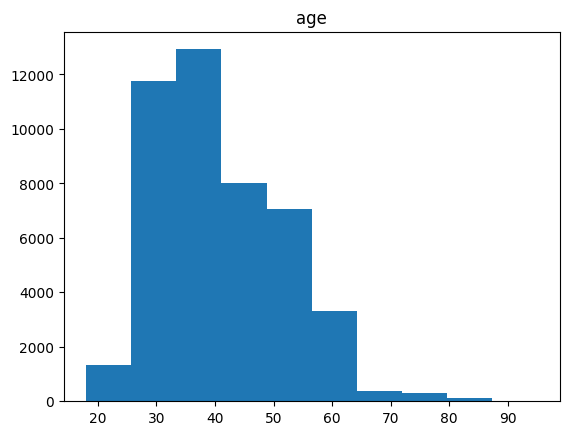

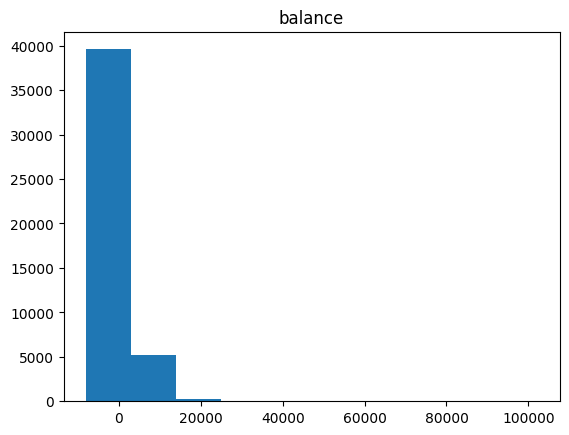

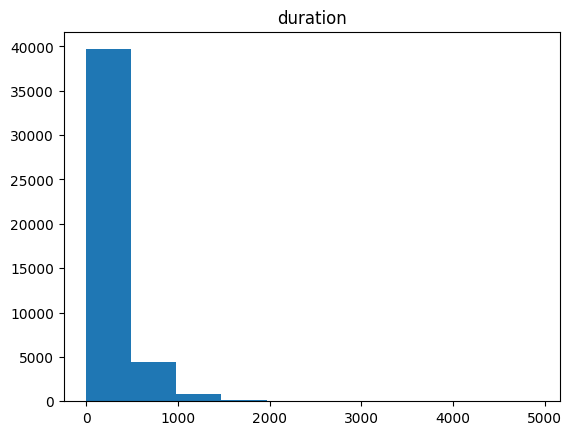

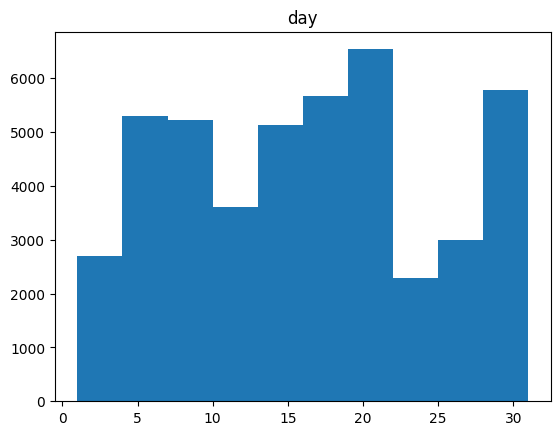

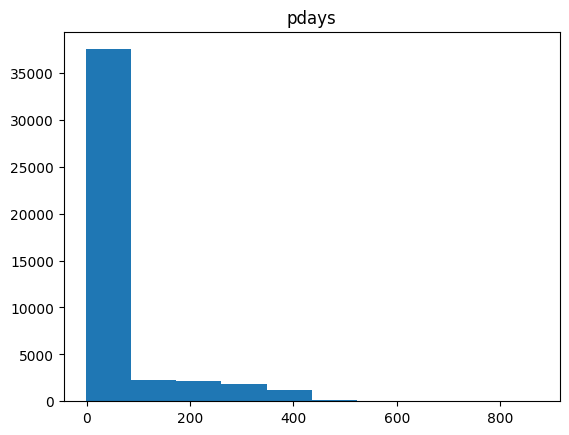

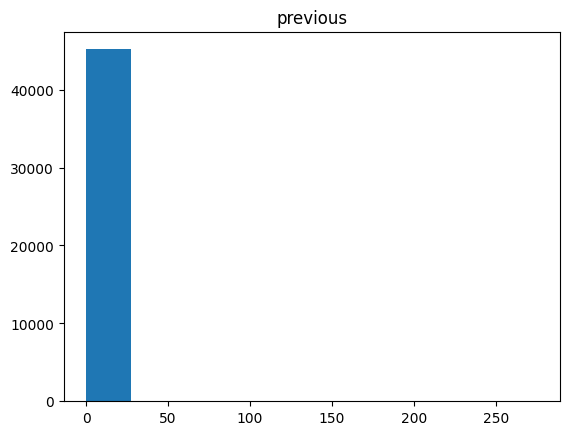

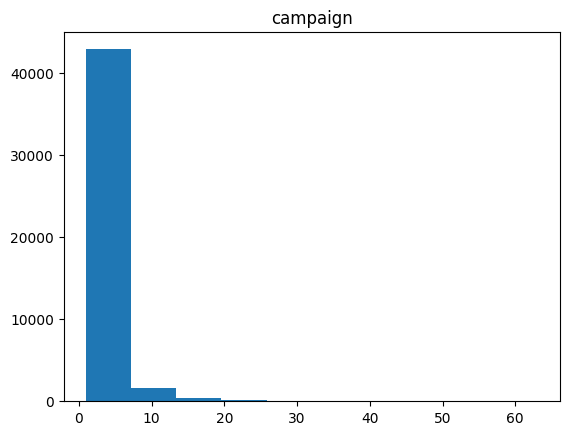

In [11]:
for l in lista_numericas:
    plt.hist(df_bank[l])
    plt.title(l)
    plt.show()

In [12]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Preprocesado rápido

In [13]:
## Transformamos las variables a dummies
for k in lista_categoricas:
    dummies = pd.get_dummies(df_bank[k],prefix=k)
    df_bank = pd.concat([df_bank, dummies], axis=1)

In [14]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,management,married,tertiary,0,2143,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,44,technician,single,secondary,0,29,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,33,unknown,single,unknown,0,1,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1


In [15]:
le = LabelEncoder()

In [16]:
## También a numéricas
df_bank.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),
                      (1,2,3,4,5,6,7,8,9,10,11,12),inplace=True)

df_bank.education.replace(('primary','secondary','tertiary','unknown'),
                      (1,2,3,4),inplace=True)

df_bank.marital.replace(('married','single','divorced'),
                      (1,2,3),inplace=True)

df_bank.contact.replace(('cellular','unknown','telephone'),
                      (1,2,3),inplace=True)

df_bank.poutcome.replace(('failure','unknown','other','success'),
                      (1,2,3,4),inplace=True)

In [17]:
le.fit(df_bank.job.unique())
le.classes_

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'unknown'], dtype=object)

In [18]:
df_bank.job.head()

0      management
1      technician
2    entrepreneur
3     blue-collar
4         unknown
Name: job, dtype: object

In [19]:
le.transform(df_bank.job)

array([4, 9, 2, ..., 5, 1, 2])

In [20]:
df_bank.job = le.transform(df_bank.job)

In [21]:
df_bank.job.head()

0     4
1     9
2     2
3     1
4    11
Name: job, dtype: int32

In [22]:
corr = abs(df_bank.corr())
corr[['y']].sort_values(by = 'y',ascending = False).style.background_gradient()

,y
y,1.000000
duration,0.394521
poutcome_success,0.306788
poutcome,0.213476
poutcome_unknown,0.167051
contact_unknown,0.150935
housing,0.139173
contact_cellular,0.135873
month_mar,0.129456
month_oct,0.128531


### Muestreo estratificado

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_bank.drop('y',axis=1),
                                                    df_bank.y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify = df_bank.y)

### Modelos

In [24]:
model1 = RandomForestClassifier().fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [25]:
def saca_metricas(y1, y2):
    print('matriz de confusión')
    print(confusion_matrix(y1, y2))
    print('accuracy')
    print(accuracy_score(y1, y2))
    print('precision')
    print(precision_score(y1, y2))
    print('recall')
    print(recall_score(y1, y2))
    print('f1')
    print(f1_score(y1, y2))
    false_positive_rate, recall, thresholds = roc_curve(y1, y2)
    roc_auc = auc(false_positive_rate, recall)
    print('AUC')
    print(roc_auc)
    plt.plot(false_positive_rate, recall, 'b')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('AUC = %0.2f' % roc_auc)  

matriz de confusión
[[7778  207]
 [ 635  423]]
accuracy
0.9068893066460245
precision
0.6714285714285714
recall
0.3998109640831758
f1
0.5011848341232227
AUC
0.6869436786602479


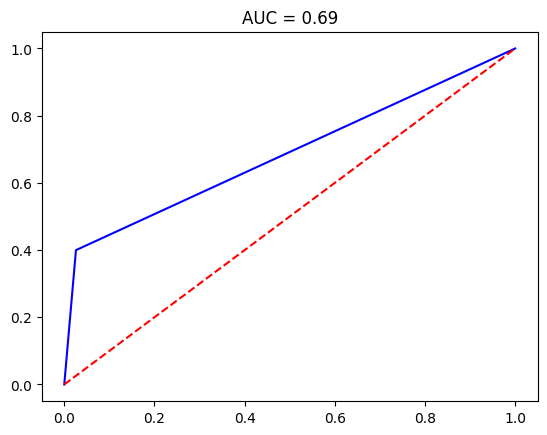

In [26]:
saca_metricas(y_test, y_pred)

In [27]:
model2 = XGBClassifier().fit(X_train, y_train)
y_pred = model2.predict(X_test)

matriz de confusión
[[7692  293]
 [ 544  514]]
accuracy
0.9074422205020458
precision
0.6369268897149938
recall
0.48582230623818523
f1
0.5512064343163539
AUC
0.7245642526807707


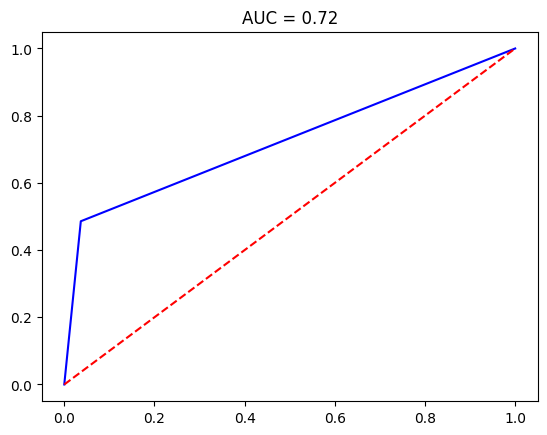

In [28]:
saca_metricas(y_test, y_pred)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

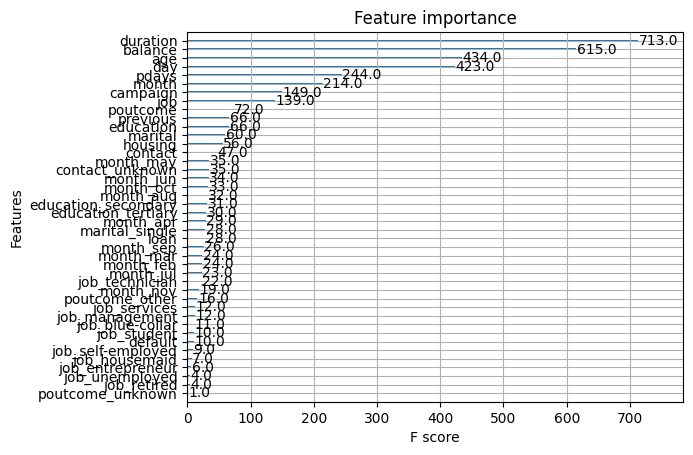

In [31]:
import xgboost
xgboost.plot_importance(model2)